Analisis de Datos

Cindy Patricia Ureche Lopez

Grupo 202016908_91

Tarea 5

In [5]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Análisis Exploratorio de Datos (EDA)

In [8]:
#Cargamos el dataset 
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.shape

(891, 12)

In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Histograma de la variable Survived

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

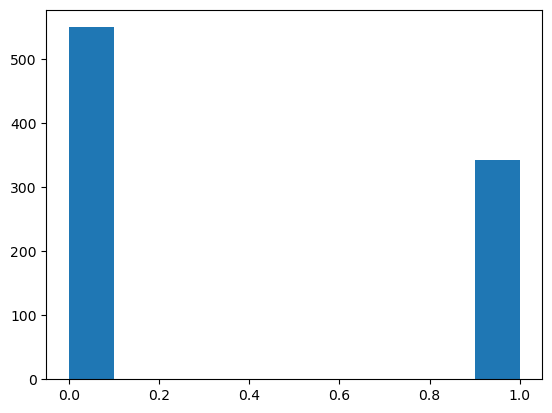

In [18]:
plt.hist(data.Survived)

Este histograma muestra la distribución de la variable Survived. La categoría 0 representa a los pasajeros que no sobrevivieron, mientras que la categoría 1 representa a los que sí lo hicieron.

Diagrama de dispersión de Age vs. Fare

<Axes: xlabel='Age', ylabel='Fare'>

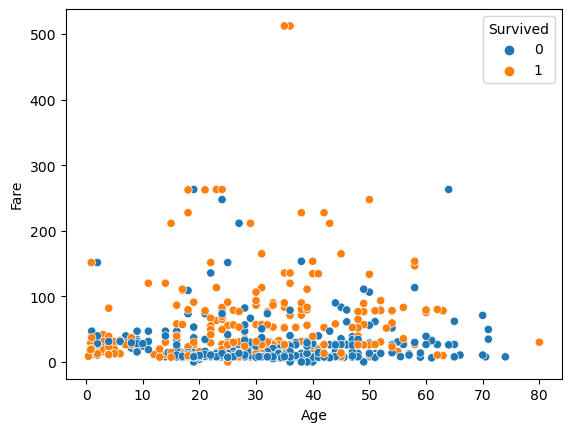

In [25]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)

Este gráfico representa la relación entre la edad (Age) y la tarifa pagada (Fare), con los puntos coloreados según la supervivencia (Survived).

Boxplot de Fare, Age y Pclass

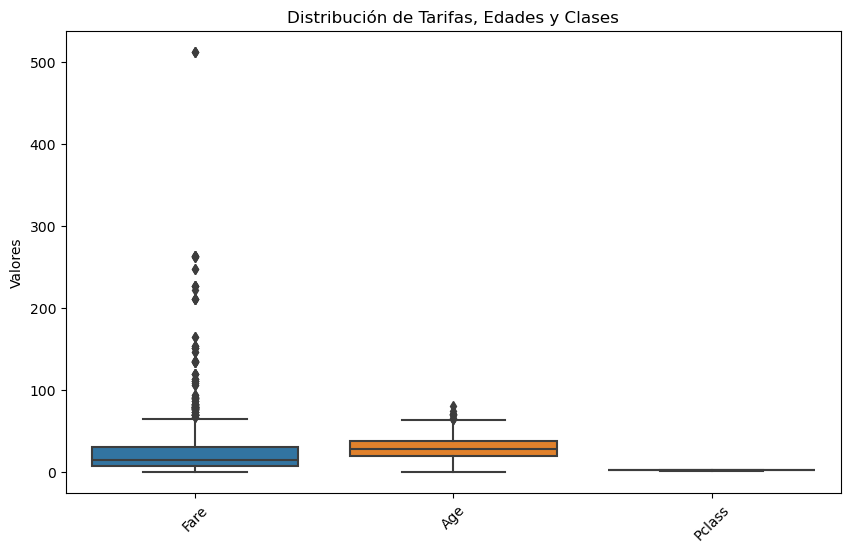

In [28]:
# Crear el gráfico
plt.figure(figsize=(10, 6))  
sns.boxplot(data=data[['Fare', 'Age', 'Pclass']])
plt.xticks(rotation=45)
plt.title('Distribución de Tarifas, Edades y Clases') 
plt.ylabel('Valores')
plt.show()

El boxplot permite analizar la distribución y dispersión de las variables Fare, Age y Pclass.
Las tarifas (Fare) tienen valores atípicos muy altos, probablemente asociados a pasajeros de primera clase.
La edad (Age) está distribuida uniformemente, pero existen algunos valores extremos que podrían representar adultos mayores.
La clase (Pclass) muestra grupos más claramente definidos, con menor dispersión.

In [46]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [102]:
predictors_col = ['Age','PassengerId','Pclass','Fare']  # Características independientes
target_col = 'Survived' 

In [104]:
predictors = data[predictors_col]
target = data[target_col]

In [106]:
predictors

,Age,PassengerId,Pclass,Fare
0,22.0,1,3,7.2500
1,38.0,2,1,71.2833
2,26.0,3,3,7.9250
3,35.0,4,1,53.1000
4,35.0,5,3,8.0500
...,...,...,...,...
886,27.0,887,2,13.0000
887,19.0,888,1,30.0000
888,NaN,889,3,23.4500
889,26.0,890,1,30.0000


In [108]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Mapa de calor de la matriz de correlación

In [110]:
corr = predictors.corr()
corr

,Age,PassengerId,Pclass,Fare
Age,1.000000,0.036847,-0.369226,0.096067
PassengerId,0.036847,1.000000,-0.035144,0.012658
Pclass,-0.369226,-0.035144,1.000000,-0.549500
Fare,0.096067,0.012658,-0.549500,1.000000


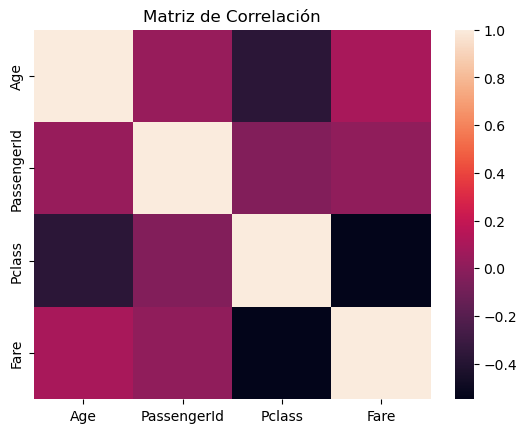

In [112]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

Este mapa de calor muestra la correlación entre las variables independientes seleccionadas (Age, PassengerId, Pclass, Fare). Los colores indican la dirección y la magnitud de la correlación.
Se identifica una fuerte correlación negativa entre Pclass y Fare, lo cual es esperado ya que las tarifas más altas están asociadas a las clases superiores. No se observan correlaciones significativas con Age, lo que sugiere que podría ser menos relevante como predictor.

In [114]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [116]:
tree = DecisionTreeClassifier()

Árbol de decisión

In [118]:
arbol = tree.fit(X_train, y_train)

[Text(0.6763771186440678, 0.98, 'x[2] <= 2.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.4341101694915254, 0.94, 'x[3] <= 30.75\ngini = 0.495\nsamples = 314\nvalue = [142, 172]'),
 Text(0.19661016949152543, 0.9, 'x[0] <= 15.0\ngini = 0.498\nsamples = 174\nvalue = [93, 81]'),
 Text(0.18305084745762712, 0.86, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.21016949152542372, 0.86, 'x[3] <= 7.75\ngini = 0.49\nsamples = 163\nvalue = [93, 70]'),
 Text(0.19661016949152543, 0.82, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.22372881355932203, 0.82, 'x[1] <= 19.5\ngini = 0.496\nsamples = 153\nvalue = [83, 70]'),
 Text(0.21016949152542372, 0.78, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.23728813559322035, 0.78, 'x[1] <= 287.0\ngini = 0.494\nsamples = 150\nvalue = [83, 67]'),
 Text(0.07457627118644068, 0.74, 'x[0] <= 50.5\ngini = 0.423\nsamples = 46\nvalue = [32, 14]'),
 Text(0.061016949152542375, 0.7, 'x[1] <= 99.5\ngini = 0.46\nsamples = 39\nvalue = [25

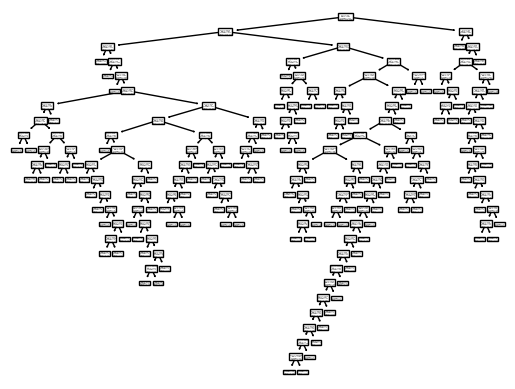

In [120]:
plot_tree(arbol)

El árbol de decisión muestra las divisiones realizadas en los datos para clasificar a los pasajeros según su supervivencia. Las variables utilizadas en cada nodo indican su relevancia en la toma de decisiones.
La variable Pclass aparece como un factor principal en las divisiones, lo que refuerza la hipótesis de que el estatus socioeconómico influye significativamente en las probabilidades de supervivencia.

In [122]:
predicciones = arbol.predict(X_test)

In [124]:
predicciones

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1])

Matriz de confusión

In [126]:
# Examinamos la matriz de confusión
pd.crosstab(
    y_test,  # Usa y_test directamente
    predicciones, 
    rownames=['Actual'], 
    colnames=['Predicciones']
)

Predicciones,0,1
Actual,,
0,89,16
1,42,32


El modelo identificó correctamente a 89 pasajeros que no sobrevivieron (verdaderos negativos) y a 32 que sobrevivieron (verdaderos positivos).
Sin embargo, 16 pasajeros que no sobrevivieron fueron clasificados erróneamente como sobrevivientes (falsos positivos), mientras que 42 pasajeros que sobrevivieron fueron clasificados como no sobrevivientes (falsos negativos).

Métricas de evaluación

In [128]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6759776536312849

El modelo tiene una precisión moderada, ya que clasifica correctamente aproximadamente el 68% de los pasajeros.

In [130]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.6741296714856355

De todas las predicciones positivas realizadas por el modelo (es decir, predicciones de que un pasajero sobrevivió), el 67.41% fueron correctas.

In [132]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.6759776536312849

 El modelo identifica correctamente a aproximadamente el 67.59% de los pasajeros que realmente sobrevivieron.

In [134]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.6592993708680717

El F1-score combina precisión y recall, lo que indica que el modelo tiene un desempeño equilibrado pero moderado.